In [1]:
import pandas as pd
import numpy as np

from pandas import Series
from numpy.random import randn

from sklearn.preprocessing import LabelEncoder 

import matplotlib.pyplot as plt # for vizualization
from matplotlib.pyplot import figure # for figuresize

In [27]:
np.version.version

'1.15.3'

In [2]:
train = pd.read_csv(r"C:\Users\daniel\Documents\GitHub\datasets\titanic\train.csv")
test =  pd.read_csv(r"C:\Users\daniel\Documents\GitHub\datasets\titanic\test.csv")

In [3]:
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"].astype(str))
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [5]:
test["Sex"] = le.fit_transform(test["Sex"])
test["Embarked"] = le.fit_transform(test["Embarked"].astype(str))
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [6]:
def prep_data(df):
    # Drop unwanted features
    # df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    
    # Fill missing data: Age and Fare with the mean, Embarked with most frequent value
    df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())
    df[['Fare']] = df[['Fare']].fillna(value=df[['Fare']].mean())
    #df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())
    
    # Convert categorical  features into numeric
    # df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
      
    # Convert Embarked to one-hot
    #enbarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
    #df = df.drop('Embarked', axis=1)
    #df = df.join(enbarked_one_hot)

    return df

In [7]:
train = prep_data(train)
test = prep_data(test)

In [8]:
x_train = train
y_train = train["Survived"].to_frame()
x_train.drop(["Survived"], axis=1, inplace=True)
x_test = test
y_test = pd.DataFrame(0, index=np.arange(len(x_test)), columns=["Survived"])
#y_train.reshape(-1,1)

In [9]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8, 891)
(1, 891)
(8, 418)
(1, 418)


In [11]:
x_train.head(11)

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1.00,2.0000,3.000,4.0,5.00,6.000000,7.0000,8.000,9.0000,10.0000,...,882.0000,883.0000,884.0,885.00,886.000,887.0,888.0,889.000000,890.0,891.00
Pclass,3.00,1.0000,3.000,1.0,3.00,3.000000,1.0000,3.000,3.0000,2.0000,...,3.0000,3.0000,2.0,3.00,3.000,2.0,1.0,3.000000,1.0,3.00
Sex,1.00,0.0000,0.000,0.0,1.00,1.000000,1.0000,1.000,0.0000,0.0000,...,1.0000,0.0000,1.0,1.00,0.000,1.0,0.0,0.000000,1.0,1.00
Age,22.00,38.0000,26.000,35.0,35.00,29.699118,54.0000,2.000,27.0000,14.0000,...,33.0000,22.0000,28.0,25.00,39.000,27.0,19.0,29.699118,26.0,32.00
SibSp,1.00,1.0000,0.000,1.0,0.00,0.000000,0.0000,3.000,0.0000,1.0000,...,0.0000,0.0000,0.0,0.00,0.000,0.0,0.0,1.000000,0.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00,0.000000,0.0000,1.000,2.0000,0.0000,...,0.0000,0.0000,0.0,0.00,5.000,0.0,0.0,2.000000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05,8.458300,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.450000,30.0,7.75
Embarked,2.00,0.0000,2.000,2.0,2.00,1.000000,2.0000,2.000,2.0000,0.0000,...,2.0000,2.0000,2.0,2.00,1.000,2.0,2.0,2.000000,0.0,1.00


In [28]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"W1": np.random.randn(2,x_train.shape[0]) * 0.1,
                  "b1": np.zeros((2,1)),
                  "W2": np.random.randn(2,2) * 0.1,
                  "b2": np.zeros((2,1)),
                  "W3": np.random.randn(1,2) * 0.1,
                  "b3": np.zeros((1,1))}
    
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train.values)

In [29]:
x_train.shape[0]

8

In [30]:
print(parameters["W1"].shape)
print(parameters["W2"].shape)
print(parameters["W3"].shape)

(2, 8)
(2, 2)
(1, 2)


In [31]:
print(parameters["b1"].shape)
print(parameters["b2"].shape)
print(parameters["b3"].shape)

(2, 1)
(2, 1)
(1, 1)


In [32]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [33]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["W1"],x_train) + parameters["b1"]
    A1 = np.tanh(Z1) # tanh is used as activation function 1
    Z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
    A2 = np.tanh(Z2) # tanh is used as activation function 2
    Z3 = np.dot(parameters["W3"],A2) + parameters["b3"]
    A3 = sigmoid(Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "W1": parameters["W1"],
             "Z2": Z2,
             "A2": A2,
             "W2": parameters["W2"],
             "Z3": Z3,
             "A3": A3,
             "W3": parameters["W3"]}
    
    return A3, cache

A3, cache = forward_propagation_NN(x_train, parameters)

In [34]:
x_train.shape[0]

8

In [35]:
parameters

{'W1': array([[-0.05003054, -0.04905266,  0.09212111, -0.07237471,  0.05946142,
         -0.0523728 ,  0.00158118, -0.00879296],
        [ 0.00558141, -0.01883161,  0.02061962,  0.0864645 , -0.02101028,
          0.07014221, -0.08550124, -0.19891647]]), 'b1': array([[0.],
        [0.]]), 'W2': array([[ 0.05527738,  0.17611725],
        [-0.09691171, -0.00491681]]), 'b2': array([[0.],
        [0.]]), 'W3': array([[ 0.00403816, -0.05837934]]), 'b3': array([[0.]])}

In [36]:
A3

array([[0.49880889, 0.49830345, 0.49877259, 0.4983136 , 0.49878225,
        0.49878427, 0.49850481, 0.49913186, 0.49874919, 0.49845573,
        0.49868104, 0.49877866, 0.49871981, 0.49868174, 0.49863754,
        0.49878158, 0.49876028, 0.49874334, 0.49869966, 0.49877783,
        0.49865263, 0.49876303, 0.49867073, 0.49836615, 0.4983883 ,
        0.49867225, 0.49877716, 0.49832067, 0.49877106, 0.49876592,
        0.49874646, 0.49829203, 0.49877135, 0.49878248, 0.49829192,
        0.49834413, 0.49877643, 0.49871584, 0.49847513, 0.49863381,
        0.49877864, 0.49861138, 0.49877569, 0.49831029, 0.4987214 ,
        0.49876703, 0.49874539, 0.49877235, 0.49871392, 0.49849571,
        0.49829982, 0.49872484, 0.498297  , 0.49856641, 0.49868456,
        0.49841064, 0.49869988, 0.49877585, 0.49830243, 0.49829251,
        0.49876303, 0.49828969, 0.49829008, 0.49830037, 0.49866113,
        0.4987649 , 0.49876123, 0.49871148, 0.49869674, 0.49875548,
        0.49877067, 0.4982921 , 0.49828961, 0.49

In [37]:
A3.shape

(1, 891)

In [38]:
np.nan_to_num(A3)

array([[0.49880889, 0.49830345, 0.49877259, 0.4983136 , 0.49878225,
        0.49878427, 0.49850481, 0.49913186, 0.49874919, 0.49845573,
        0.49868104, 0.49877866, 0.49871981, 0.49868174, 0.49863754,
        0.49878158, 0.49876028, 0.49874334, 0.49869966, 0.49877783,
        0.49865263, 0.49876303, 0.49867073, 0.49836615, 0.4983883 ,
        0.49867225, 0.49877716, 0.49832067, 0.49877106, 0.49876592,
        0.49874646, 0.49829203, 0.49877135, 0.49878248, 0.49829192,
        0.49834413, 0.49877643, 0.49871584, 0.49847513, 0.49863381,
        0.49877864, 0.49861138, 0.49877569, 0.49831029, 0.4987214 ,
        0.49876703, 0.49874539, 0.49877235, 0.49871392, 0.49849571,
        0.49829982, 0.49872484, 0.498297  , 0.49856641, 0.49868456,
        0.49841064, 0.49869988, 0.49877585, 0.49830243, 0.49829251,
        0.49876303, 0.49828969, 0.49829008, 0.49830037, 0.49866113,
        0.4987649 , 0.49876123, 0.49871148, 0.49869674, 0.49875548,
        0.49877067, 0.4982921 , 0.49828961, 0.49

In [39]:
def compute_cost_NN(A3, Y, parameters):
    
    logprobs = np.multiply(np.log(A3),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return cost

cost = compute_cost_NN(A3, y_train, parameters)

In [40]:
np.nan_to_num(A3)

array([[0.49880889, 0.49830345, 0.49877259, 0.4983136 , 0.49878225,
        0.49878427, 0.49850481, 0.49913186, 0.49874919, 0.49845573,
        0.49868104, 0.49877866, 0.49871981, 0.49868174, 0.49863754,
        0.49878158, 0.49876028, 0.49874334, 0.49869966, 0.49877783,
        0.49865263, 0.49876303, 0.49867073, 0.49836615, 0.4983883 ,
        0.49867225, 0.49877716, 0.49832067, 0.49877106, 0.49876592,
        0.49874646, 0.49829203, 0.49877135, 0.49878248, 0.49829192,
        0.49834413, 0.49877643, 0.49871584, 0.49847513, 0.49863381,
        0.49877864, 0.49861138, 0.49877569, 0.49831029, 0.4987214 ,
        0.49876703, 0.49874539, 0.49877235, 0.49871392, 0.49849571,
        0.49829982, 0.49872484, 0.498297  , 0.49856641, 0.49868456,
        0.49841064, 0.49869988, 0.49877585, 0.49830243, 0.49829251,
        0.49876303, 0.49828969, 0.49829008, 0.49830037, 0.49866113,
        0.4987649 , 0.49876123, 0.49871148, 0.49869674, 0.49875548,
        0.49877067, 0.4982921 , 0.49828961, 0.49

In [42]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dimension = X.shape[0] # it is 20 for our case
    dZ3 = cache["A3"] - Y # d(cost)/d(Z3)
    dW3 = 1/dimension * np.dot(dZ3,cache["A2"].T) # d(cost)/d(W3)
    db3 = 1/dimension * np.sum(dZ3, axis=1, keepdims=True) # d(cost)/d(b3)
    dZ2 = np.multiply(np.dot(dZ3.T, cache["W3"]).T , 1-np.power(cache["A2"],2)) # d(cost)/d(Z2)
    dW2 = 1/dimension * np.dot(cache["A1"], dZ2.T) # d(cost)/d(W2)
    db2 = 1/dimension * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/d(b2)
    dZ1 = np.multiply(np.dot(dZ2.T, cache["W2"].T).T,1-np.power(cache["A1"],2)) # d(cost)/d(Z1)
    dW1 = 1/dimension * np.dot(dZ1, X.T) # d(cost)/d(W1)
    db1 = 1/dimension * np.sum(dZ1,axis=1, keepdims=True) # d(cost)/d(b1)
    grads = {'dW3':dW3, 
             'db3':db3,
             'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

grads = backward_propagation_NN(parameters, cache, x_train, y_train.values)

In [43]:
Learning_Rate = 0.001

In [44]:
parameters["b3"]

array([[0.]])

In [45]:
grads["db3"]

array([[12.79192086]])

In [46]:
grads

{'dW3': array([[2.27636541, 1.1487005 ]]),
 'db3': array([[12.79192086]]),
 'dW2': array([[-0.05104775,  0.73823765],
        [ 0.06747044, -0.98501333]]),
 'db2': array([[ 0.05121731],
        [-0.74076813]]),
 'dW1': array([[-8.25470199e-03, -2.06656164e-03, -1.03171085e-03,
         -1.70857408e-03, -2.85433511e-03, -6.42748865e-04,
         -1.98708301e-02, -1.24837997e-03],
        [ 3.51215945e-02, -1.10921760e-04, -1.29970704e-04,
         -3.00823759e-04, -1.89820506e-04,  3.30621136e-05,
          2.84100113e-03, -5.01405379e-05]]),
 'db1': array([[-6.42832420e-04],
        [ 1.12008568e-05]])}

In [47]:
parameters["b3"]-Learning_Rate*grads["db3"]

array([[-0.01279192]])

In [48]:
def update_parameters_NN(parameters, grads, learning_rate = Learning_Rate):
    parameters = {"W1": parameters["W1"]-learning_rate*grads["dW1"],
                  "b1": parameters["b1"]-learning_rate*grads["db1"],
                  "W2": parameters["W2"]-learning_rate*grads["dW2"],
                  "b2": parameters["b2"]-learning_rate*grads["db2"],
                  "W3": parameters["W3"]-learning_rate*grads["dW3"],
                  "b3": parameters["b3"]-learning_rate*grads["db3"]}
    
    return parameters

parameters = update_parameters_NN(parameters, grads, learning_rate = Learning_Rate)

In [49]:
def predict_NN(parameters,x_test):
    # x_test is the input for forward propagation
    A3, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A3.shape[1]):
        if A3[0,i]<= 0.5: # if smaller than 0.5, predict it as 0
            Y_prediction[0,i] = 0
        else: # if greater than 0.5, predict it as 1
            Y_prediction[0,i] = 1

    return Y_prediction

Y_prediction = predict_NN(parameters,x_test)

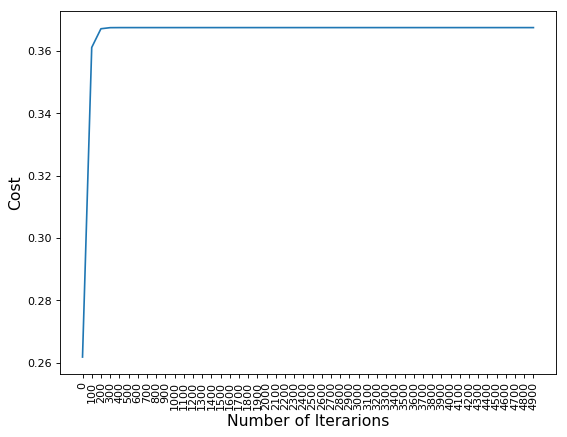

train accuracy: %61.616
test accuracy: %100.0


In [51]:
def three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A3, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A3, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0: # to visualize data in each 100 iteration
            cost_list.append(cost)
            index_list.append(i)

    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarions", fontsize = 14)
    plt.ylabel("Cost", fontsize = 14)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Accuracies
    print("train accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,3)))
    print("test accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,3)))
    return parameters

parameters = three_layer_neural_network(x_train, y_train.values,x_test,y_test.values, num_iterations=5000)
